# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_data = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='
print("Beginning Data Retrieval \n -----------------------------")
for city in cities:
    response = requests.get(url+city+"&APPID="+weather_api_key).json()
    try:
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        city_data.append({"City": city,
                        "Latitude": lat,
                        "Longitude": lon,
                        "Temperature": temp,
                        "Humidity": humidity,
                        "Cloud Conditions": cloud,
                        "Wind Speed": wind,
                        "Country": country,
                        "Date": date})

        print(f"Processing Record response {cities.index(city)}: {city}")
        
    except:
        print("There's nothing here!")
        pass
print("All Done!")

Beginning Data Retrieval 
 -----------------------------
Processing Record response 0: victoria
Processing Record response 1: tuatapere
Processing Record response 2: ambulu
There's nothing here!
Processing Record response 4: hasaki
Processing Record response 5: tasiilaq
Processing Record response 6: atuona
Processing Record response 7: santa margherita ligure
Processing Record response 8: albany
Processing Record response 9: ushuaia
Processing Record response 10: carmichael
Processing Record response 11: jamestown
Processing Record response 12: luohe
Processing Record response 13: ucluelet
Processing Record response 14: weihai
Processing Record response 15: avera
There's nothing here!
Processing Record response 17: yumen
Processing Record response 18: saskylakh
Processing Record response 19: hay river
There's nothing here!
Processing Record response 21: dikson
Processing Record response 22: tuktoyaktuk
Processing Record response 23: nikolskoye
Processing Record response 24: thompson
Pr

Processing Record response 213: beloha
Processing Record response 214: mwense
Processing Record response 215: kresttsy
Processing Record response 216: kaoma
Processing Record response 217: kalianget
Processing Record response 218: karpogory
Processing Record response 219: novikovo
Processing Record response 220: port elizabeth
Processing Record response 221: moree
Processing Record response 222: byron bay
Processing Record response 223: sao joao da barra
Processing Record response 224: ulladulla
Processing Record response 225: hokitika
Processing Record response 226: bredasdorp
Processing Record response 227: zaysan
Processing Record response 228: bozeman
There's nothing here!
Processing Record response 230: ustka
Processing Record response 231: pangnirtung
Processing Record response 232: norman wells
Processing Record response 233: datong
There's nothing here!
Processing Record response 235: sturgeon bay
Processing Record response 236: ajalpan
Processing Record response 237: kenora
Pr

There's nothing here!
Processing Record response 423: jiaojiang
Processing Record response 424: bairiki
Processing Record response 425: les herbiers
Processing Record response 426: orlik
Processing Record response 427: rodrigues alves
Processing Record response 428: romny
Processing Record response 429: sumbe
There's nothing here!
Processing Record response 431: mason city
Processing Record response 432: itupiranga
Processing Record response 433: talnakh
Processing Record response 434: urusha
Processing Record response 435: robertson
Processing Record response 436: kapit
Processing Record response 437: benavente
There's nothing here!
Processing Record response 439: gushikawa
Processing Record response 440: dali
There's nothing here!
Processing Record response 442: coihaique
Processing Record response 443: houma
Processing Record response 444: nabire
Processing Record response 445: kodinsk
Processing Record response 446: aklavik
Processing Record response 447: sonoita
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame(city_data)
cities_df.to_csv('city_data.csv', index_label = "City")
cities_df.head()

,City,Cloud Conditions,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,victoria,40,HK,1581373084,72,22.29,114.16,291.15,1.50
1,tuatapere,0,NZ,1581373084,87,-46.13,167.68,285.37,5.36
2,ambulu,100,ID,1581373084,72,-8.35,113.61,300.95,0.94
3,hasaki,20,JP,1581373019,79,35.73,140.83,272.04,2.60
4,tasiilaq,100,GL,1581372918,53,65.61,-37.64,270.15,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

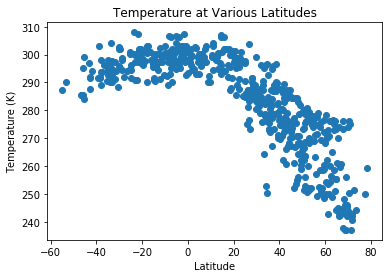

In [7]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.title("Temperature at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")

plt.show

plt.savefig('temperature_by_lat.png')
#this code creates a scatter plot comparing the relationship between temperature (in Kelvin) and latitude.
#As we can see, as temperature approaches the equator (0 on the latitude line) temperature increases
#There is a slight skew toward warmer temps south of the equator.

#### Latitude vs. Humidity Plot

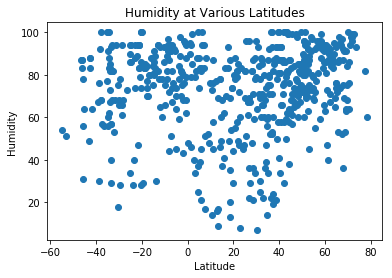

In [8]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.title("Humidity at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show
plt.savefig('humidity_by_lat.png')

#### Latitude vs. Cloudiness Plot

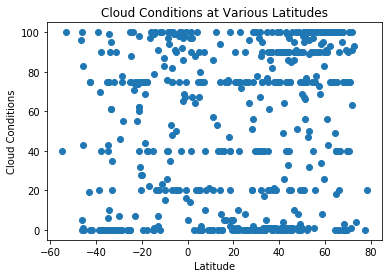

In [9]:
plt.scatter(cities_df['Latitude'], cities_df['Cloud Conditions'])
plt.title("Cloud Conditions at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Cloud Conditions")
plt.show
plt.savefig('cloudiness_by_latitude.png')

#### Latitude vs. Wind Speed Plot

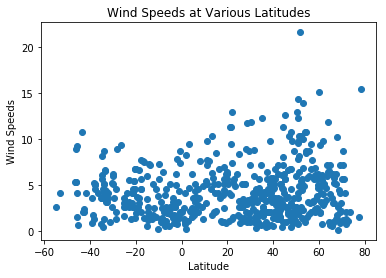

In [10]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.title("Wind Speeds at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
plt.show
plt.savefig('wind_by_lat.png')

## Linear Regression

In [48]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_func(x_df, y_df):
    x_vals = np.array([x for x in x_df])
    y_vals = np.array([y for y in y_df])
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = [(x * slope + intercept) for x in x_vals]
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_vals, regress_values, "r")
    plt.annotate(equation, (0, 10) , fontsize=10,color="black")

In [49]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities = cities_df.loc[cities_df["Latitude"] > 0]
southern_cities = cities_df.loc[cities_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

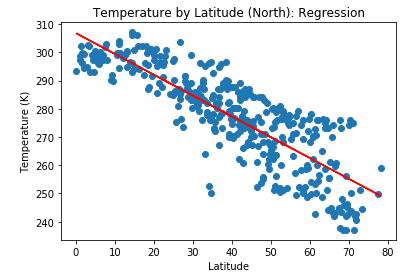

In [50]:
plt.scatter(northern_cities["Latitude"], northern_cities["Temperature"],)
regression_func(northern_cities['Latitude'], northern_cities["Temperature"])
plt.xlabel('Latitude')
plt.ylabel("Temperature (K)")
plt.title("Temperature by Latitude (North): Regression")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

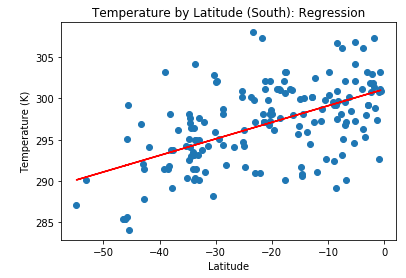

In [51]:
plt.scatter(southern_cities["Latitude"], southern_cities["Temperature"],)
regression_func(southern_cities['Latitude'], southern_cities["Temperature"])
plt.xlabel('Latitude')
plt.ylabel("Temperature (K)")
plt.title("Temperature by Latitude (South): Regression")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

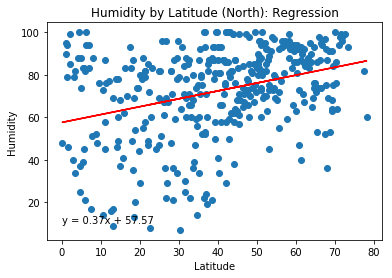

In [52]:
plt.scatter(northern_cities["Latitude"], northern_cities["Humidity"],)
regression_func(northern_cities['Latitude'], northern_cities["Humidity"])
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.title("Humidity by Latitude (North): Regression")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

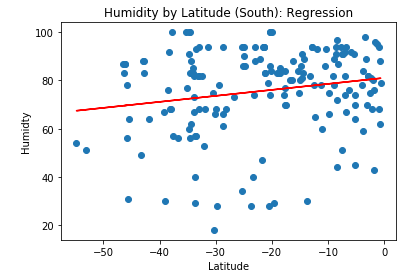

In [54]:
plt.scatter(southern_cities["Latitude"], southern_cities["Humidity"],)
regression_func(southern_cities['Latitude'], southern_cities["Humidity"])
plt.xlabel('Latitude')
plt.ylabel("Humidty")
plt.title("Humidity by Latitude (South): Regression")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

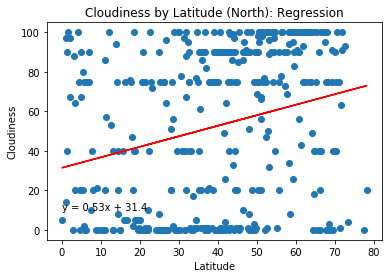

In [55]:
plt.scatter(northern_cities["Latitude"], northern_cities["Cloud Conditions"],)
regression_func(northern_cities['Latitude'], northern_cities["Cloud Conditions"])
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude (North): Regression")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

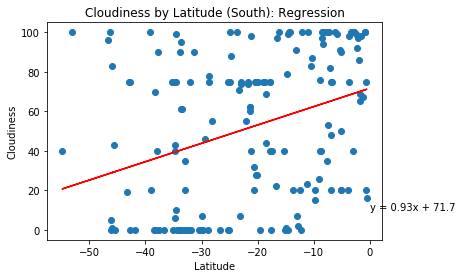

In [56]:
plt.scatter(southern_cities["Latitude"], southern_cities["Cloud Conditions"],)
regression_func(southern_cities['Latitude'], southern_cities["Cloud Conditions"])
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude (South): Regression")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

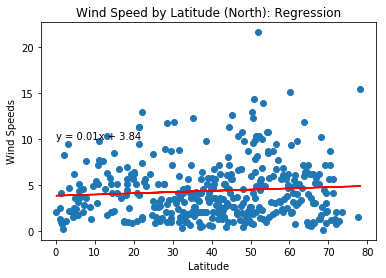

In [58]:
plt.scatter(northern_cities["Latitude"], northern_cities["Wind Speed"],)
regression_func(northern_cities['Latitude'], northern_cities["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel("Wind Speeds")
plt.title("Wind Speed by Latitude (North): Regression")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

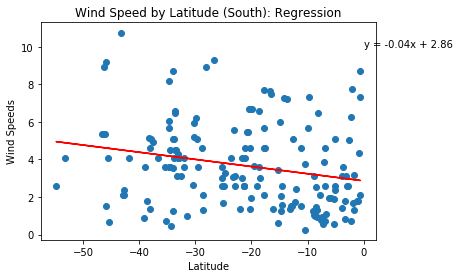

In [59]:
plt.scatter(southern_cities["Latitude"], southern_cities["Wind Speed"],)
regression_func(southern_cities['Latitude'], southern_cities["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel("Wind Speeds")
plt.title("Wind Speed by Latitude (South): Regression")
plt.show